<a href="https://colab.research.google.com/github/koushik-pavan/koushik-pavan/blob/main/arrow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(357, 517, 4)


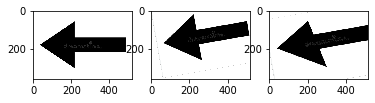

In [12]:
from skimage import data, transform
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import numpy
 
 
np_img= Image.open("/content/arrow.png")
img = numpy.array(np_img)
 
print(img.shape)

theta = np.deg2rad(10)
tx = 0
ty = 0

S, C = np.sin(theta), np.cos(theta)

# Rotation matrix, angle theta, translation tx, ty
H = np.array([[C, -S, tx],
              [S,  C, ty],
              [0,  0, 1]])

# Translation matrix to shift the image center to the origin
r, c = img.shape[0:2]
T = np.array([[1, 0, -c / 2.],
              [0, 1, -r / 2.],
              [0, 0, 1]])

# Skew, for perspective
S = np.array([[1, 0, 0],
              [0, 1.3, 0],
              [0, 1e-3, 1]])

img_rot = transform.warp(img, H)
img_rot_center_skew = transform.warp(img, S.dot(np.linalg.inv(T).dot(H).dot(T)))

f, (ax0, ax1, ax2) = plt.subplots(1, 3)
ax0.imshow(img, cmap=plt.cm.gray, interpolation='nearest')
ax1.imshow(img_rot, cmap=plt.cm.gray, interpolation='nearest')
ax2.imshow(img_rot_center_skew, cmap=plt.cm.gray, interpolation='nearest')
plt.show()

In [ ]:
+